 Lambda School Data Science

 *Unit 2, Sprint 1, Module 1*

 ---

 # Regression 1

 ## Assignment

 You'll use another **New York City** real estate dataset.

 But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

 The data comes from renthop.com, an apartment listing website.

 - [ ] Look at the data. Choose a feature, and plot its relationship with the target.
 - [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
 - [ ] Define a function to make new predictions and explain the model coefficient.
 - [ ] Organize and comment your code.

 > [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

 If your **Plotly** visualizations aren't working:
 - You must have JavaScript enabled in your browser
 - You probably want to use Chrome or Firefox
 - You may need to turn off ad blockers
 - [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

 ## Stretch Goals
 - [ ] Do linear regression with two or more features.
 - [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
 - [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [3]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')



In [4]:
# Read New York City apartment rental listing data
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/condos/tribeca.csv',
parse_dates = ['SALE_DATE'], 
index_col = 'SALE_DATE',
dtype = {'ZIP_CODE': 'object','SALE_PRICE':'float','YEAR_BUILT':'int'})



In [5]:
df.shape


(90, 8)

 ## Code by Parvi from here on --->

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2019-01-03 to 2019-04-30
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NEIGHBORHOOD             90 non-null     object 
 1   BUILDING_CLASS_CATEGORY  90 non-null     object 
 2   ADDRESS                  90 non-null     object 
 3   APARTMENT_NUMBER         90 non-null     object 
 4   ZIP_CODE                 90 non-null     object 
 5   GROSS_SQUARE_FEET        90 non-null     float64
 6   YEAR_BUILT               90 non-null     int64  
 7   SALE_PRICE               90 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.3+ KB


In [7]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,,,,,
2019-01-03,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013.0,1840.0,1909,2800000.0
2019-01-07,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004.0,1759.0,0,2650000.0
2019-01-09,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004.0,1190.0,2005,1005000.0
2019-01-10,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,0.0,1088.0,2006,1678000.0
2019-01-11,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280.0,873.0,0,1380000.0


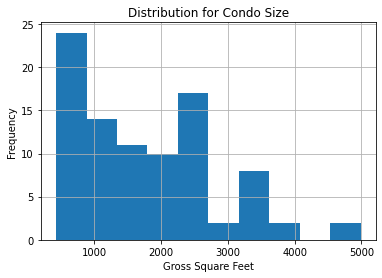

In [8]:
import matplotlib.pyplot as plt

df['GROSS_SQUARE_FEET'].hist()
plt.title('Distribution for Condo Size')
plt.xlabel('Gross Square Feet')
plt.ylabel('Frequency');

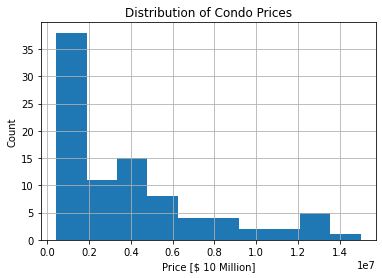

In [9]:

df['SALE_PRICE'].hist()
plt.xlabel('Price [$ 10 Million]')
plt.ylabel('Count')
plt.title('Distribution of Condo Prices');


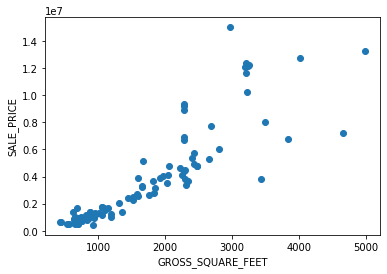

In [12]:

plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE');


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


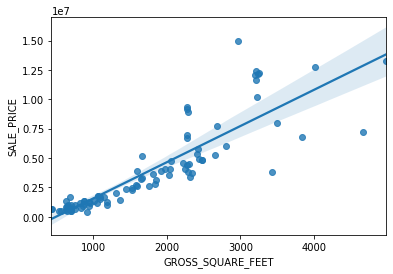

In [13]:
import seaborn as sns

sns.regplot(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])


In [14]:

# Split the Data
# Split out Feature matrix and our target vector

df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,,,,,
2019-01-03,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013.0,1840.0,1909,2800000.0
2019-01-07,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004.0,1759.0,0,2650000.0
2019-01-09,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004.0,1190.0,2005,1005000.0
2019-01-10,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,0.0,1088.0,2006,1678000.0
2019-01-11,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280.0,873.0,0,1380000.0


In [15]:
# Target vector (1-D array)
y = df['SALE_PRICE']
# Feature matrix (Two Dimensional)
X = df[['GROSS_SQUARE_FEET']]
X.shape, y.shape

((90, 1), (90,))

In [16]:

type(X)
X.head()

,GROSS_SQUARE_FEET
SALE_DATE,
2019-01-03,1840.0
2019-01-07,1759.0
2019-01-09,1190.0
2019-01-10,1088.0
2019-01-11,873.0


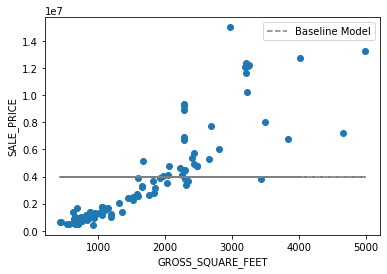

In [17]:

y_pred  = [y.mean()] * len(y)

y_pred[:5]
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(df['GROSS_SQUARE_FEET'], y_pred,
         label = 'Baseline Model',
         color = 'grey',
         linestyle = '--'
         )
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE');
plt.legend()



In [19]:
# see first ten values
y_pred[:10]

[3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667]

In [21]:
MAE = (y_pred - y).abs().mean()

MAE

2783380.1977777793

In [23]:
from sklearn.metrics import mean_absolute_error

print('Baseline MAE',mean_absolute_error(y_pred,y))



Baseline MAE 2783380.1977777784


In [ ]:
# finding the mean_absolute_error
mean_guess = df.price.mean()

# print (mean_guess)

#does not make a difference whether you choose mean_guess before or after in 
# calculation
error = mean_guess - df.price
mean_absolute_error = error.abs().mean()

print (f'The mean absolute error when using mean as the baseline is {mean_absolute_error}')


 ## The dataframe seem to be complete with no 'key' null value rows. Though there are some null values in description, display_address and street_address but they will not be a part of our model, therefore, should not be an issue.

In [ ]:
#printing the column names

df.columns



In [ ]:
# first plotting the datasets of our interst as scatter plot and 
# regression fitting with X as bedrooms and y as price

import plotly.express as px

px.scatter(data_frame= df, x = 'bedrooms', y = 'price', trendline= 'ols')



In [ ]:
#features extraction from the columns we know that we need to 
# have a model where X is and y is 'price'
import numpy as np
X_train_1D = df['bedrooms']
#note X_train must be a 2D array therefore
X_train = X_train_1D[:,np.newaxis]

# target vector being price
y_train = df['price']

# shapes
print (f'X shape is {X_train.shape} while y shape is {y_train.shape}')



In [ ]:
# choosing the class of model

from sklearn.linear_model import LinearRegression

# instantiate (make a) class model

model = LinearRegression()
model



In [ ]:
# fitting the model in X,y format
model.fit(X_train, y_train)



In [ ]:
# print out the parameters of the fit model
print (f'y = {model.intercept_} + {model.coef_[0]}X')



In [ ]:
# predicting using the model 
y_predict_bedroom = [[8]]
y_predict = model.predict(y_predict_bedroom)

print (f'For a {y_predict_bedroom[0][0]} bedroom the model predicts a rent of ${y_predict[0]}')



In [ ]:
# finding the price of a 8 bedroom apt to compare prediction with
condition = (df.bedrooms == 8)

df[condition]



In [ ]:
# finding the MAE from sklearn

from sklearn.metrics import mean_absolute_error
y_test = [9995]
mean_absolute_error(y_predict, y_test)


 ---

 # The following section is to do a multiple regression i.e. including more than one variable in feature matrix

In [ ]:
df.columns



In [ ]:
# feature engineering picking 
X = df[['bathrooms', 'bedrooms']]

# the value of y has not changed therefore no need to make target vector again
# in case needed do 
y = df['price'] 
# to get the target vector



In [ ]:
# fitting the model with the instantiated class
# no need to instantiate class again as already done above
model.fit(X,y)



In [ ]:
# predict using the model
y_pred_X = [[3,8]]
y_pred = model.predict(y_pred_X)

#printing the results
print (f'For a NYC apartment with {y_pred_X[0][0]} bathrooms and {y_pred_X[0][1]} bedrooms the predicted price is ${y_pred[0]}')



In [ ]:
# calculating the MAE
from sklearn.metrics import mean_absolute_error
y_test = [9995]
mean_absolute_error(y_pred, y_test)


 ## Pretty close to the actual price huh